In [1]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.4.1


In [19]:
import matplotlib.pyplot as plt 
import numpy as np  

### Loading MNIST Data

In [8]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) =  mnist.load_data()

In [13]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [14]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [16]:
print(y_train[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


### Plotting some data to see what it looks like

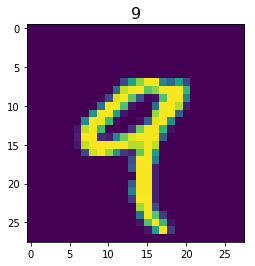

In [29]:
i = 4
plt.figure()
plt.imshow(x_train[i])
plt.grid(False)
plt.title(str(y_train[i]), size = 16)
plt.show()

In [31]:
#Normalize the training data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [33]:
x_train[0].shape

(28, 28)

In [32]:
"""We're going to use a Neural Network because this 
   is dataset of images, and Neural Networks are great 
   for working with image data
"""

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [40]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(10)
])

model_1.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 10)

In [42]:
test_loss, test_acc = model_1.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - loss: 0.2888 - accuracy: 0.9218


In [66]:
#We can get a more accurate model by increaseing the capacity of the model by increasing the number of layers.
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(10)
])

model_2.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'])

In [67]:
model_2.fit(x_train, y_train, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4744 - accuracy: 0.8572
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3325 - accuracy: 0.9053
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3237 - accuracy: 0.9074
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3104 - accuracy: 0.9136
Epoch 5/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3020 - accuracy: 0.9149
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2972 - accuracy: 0.9166
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2804 - accuracy: 0.9206 0s - loss: 0.2803 - accuracy: 
Epoch 8/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2854 - accuracy: 0.9200
Epoch 9/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2849 - accuracy: 0.9198
Epoch 10/15
1875/1875 [===================

In [71]:
loss, acc = model_2.evaluate(x_train, y_train, verbose = 2)

1875/1875 - 5s - loss: 0.2584 - accuracy: 0.9254


In [69]:
test_loss, test_acc = model_2.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.2930 - accuracy: 0.9201


In [80]:
some_list = []
some_list.append(tf.keras.layers.Dense(10))
some_list

In [84]:
def make_model(number_of_layers, nodes, number_of_epochs, x, y):
    
    layers = []
    layers.append(tf.keras.layers.Flatten(input_shape = (28,28)))
    
    for i in range(number_of_layers):
        layers.append(tf.keras.layers.Dense(nodes[i],activation = 'relu'))
   
    layers.append(tf.keras.layers.Dense(10))
    
    model = tf.keras.Sequential(layers)
    
    model.compile(optimizer = 'adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics = ['accuracy'])
    model.fit(x, y, epochs = number_of_epochs)
    return(model)

In [89]:
def make_model(number_of_layers, nodes, number_of_epochs, x, y):
    
    layers = []
    layers.append(tf.keras.layers.Flatten(input_shape = (28,28)))
    
    for i in range(number_of_layers):
        layers.append(tf.keras.layers.Dense(nodes[i],activation = 'relu'))
   
    layers.append(tf.keras.layers.Dense(10))
    
    model = tf.keras.Sequential(layers)
    
    model.compile(optimizer = 'adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics = ['accuracy'])
    model.fit(x, y, epochs = number_of_epochs)
    return(model)

def get_training_acc(model):
    loss, acc = model.evaluate(x_train, y_train, verbose = 2)
    return(acc)

def get_testing_acc(model):
    loss, acc = model.evaluate(x_test, y_test, verbose = 2)
    return(acc)

In [99]:
train_acc = []
test_acc = []

EPOCHS = [1,2,3,4,5,6,7,8,9,10,11]

for e in EPOCHS:
    model = make_model(number_of_layers = 1, #I'll try training my model over different epochs
                       nodes = [128], 
                       number_of_epochs = e, 
                       x = x_train, 
                       y = y_train)
    train_acc.append(get_training_acc(model))
    test_acc.append(get_testing_acc(model))

1875/1875 [==============================] - ETA: 0s - loss: 0.4355 - accuracy: 0.87 - 15s 7ms/step - loss: 0.4352 - accuracy: 0.8757
1875/1875 - 8s - loss: 0.1279 - accuracy: 0.9634
313/313 - 1s - loss: 0.1339 - accuracy: 0.9616
Epoch 1/2
1875/1875 [==============================] - 22s 10ms/step - loss: 0.4230 - accuracy: 0.8806
Epoch 2/2
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1147 - accuracy: 0.9664
1875/1875 - 5s - loss: 0.0819 - accuracy: 0.9755
313/313 - 1s - loss: 0.0999 - accuracy: 0.9677
Epoch 1/3
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4294 - accuracy: 0.8774
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1218 - accuracy: 0.9645
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0758 - accuracy: 0.9772
1875/1875 - 7s - loss: 0.0506 - accuracy: 0.9858
313/313 - 3s - loss: 0.0769 - accuracy: 0.9761
Epoch 1/4
1875/1875 [==============================] - 15s 7ms/step

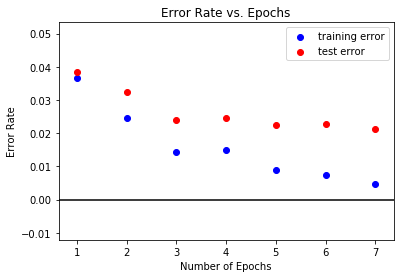

In [110]:
plt.scatter(EPOCHS, 1- np.array(train_acc), c = 'blue', label = 'training error')
plt.scatter(EPOCHS, 1-  np.array(test_acc), c = 'red', label = 'test error')
plt.xlabel("Number of Epochs")
plt.ylabel("Error Rate")
plt.title("Error Rate vs. Epochs")
plt.axhline(0, c = 'black')
plt.legend();

In [111]:
list(range(1,20))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]